## Lennard Jones Potential

test output of Lennard Jones Potential

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import particlesim.api

* Create a System with two particles and a boxlength of ten
* Let particles approach from each side of the box in 1 dimension and calculate Lennard Jones Potential for each step

In [46]:
def particle_config_LJ(box_size = 10., sigma = 1.0, epsilon = 1.0, r_lim = 0.95):
    particle_1 = [0.,0,0]
    particle_2 = [box_size - r_lim,0,0]
    particle_positions = np.array([particle_1, particle_2])
    system_configuration = particlesim.api.SystemConfiguration(particle_positions,sigmas = sigma, epsilons = epsilon,
                                                               box_size = 10.)
    distance, pot = [], []
    while particle_positions[0][0] <= particle_positions[1][0]-r_lim:
        particle_positions[0][0] += 0.01
        r = np.linalg.norm(particle_positions[0] - particle_positions[1])
        if r > box_size/2:
            r -= box_size
        distance.append(r)
        pot.append(system_configuration.potential(xyz_trial = particle_positions, coulomb = False))
    distance = distance[400:]+distance[:400]
    pot = pot[400:] + pot[:400]
    return distance[::-1], pot[::-1]

In [70]:
def particle_config_COU(charges, box_size = 10., sigma = 1.0, epsilon = 1.0, r_lim = 0.95):
    particle_1 = [0.,0,0]
    particle_2 = [box_size - r_lim,0,0]
    particle_positions = np.array([particle_1, particle_2])
    system_configuration = particlesim.api.SystemConfiguration(particle_positions,charges= charges,
                                                               sigmas = sigma,
                                                               epsilons = epsilon,
                                                               box_size = 10.)
    distance, pot = [], []
    while particle_positions[0][0] <= particle_positions[1][0]-r_lim:
        particle_positions[0][0] += 0.01
        r = np.linalg.norm(particle_positions[0] - particle_positions[1])
#        if r > box_size/2:
#            r -= box_size
        distance.append(r)
        pot.append(system_configuration.potential(xyz_trial = particle_positions))
#    distance = distance[400:]+distance[:400]
#    pot = pot[400:] + pot[:400]
    return distance[::-1], pot[::-1]

### Parameter for Na+ and Cl-

In [63]:
sigma_na = 1.21496
epsilon_na = 0.0469
q_na = +1.0

sigma_cl = 2.02234 
epsilon_cl = 0.15
q_cl = -1.0

sigmas=[sigma_na, sigma_cl]
epsilons = [epsilon_na, epsilon_cl]
charges = [q_na, q_cl]

### Calculate Lennard Jones Potential of Na+ and Cl-

<class 'matplotlib.axes._subplots.AxesSubplot'>


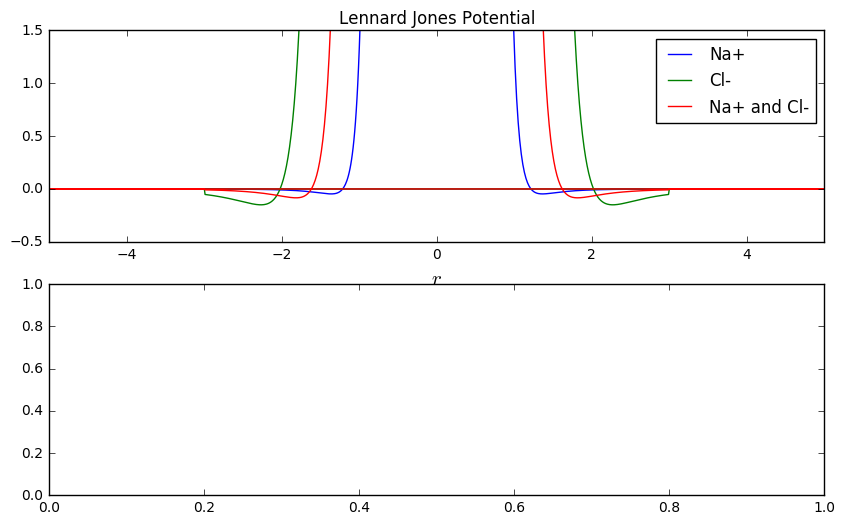

In [75]:
distance_na, pot_na = particle_config_LJ(sigma=sigma_na, epsilon=epsilon_na)
distance_cl, pot_cl = particle_config_LJ(sigma=sigma_cl,epsilon=epsilon_cl)

sigma3 = [sigma_na, sigma_cl]
epsilon3 = [epsilon_na, epsilon_cl]
distance3, pot3 = particle_config_LJ(sigma=sigma3,epsilon=epsilon3)

#plt.figure(figsize=(10,4))
#plt.plot(distance_na,pot_na, label='Na+')
#plt.plot(distance_cl,pot_cl, label='Cl-')
#plt.plot(distance3,pot3, label='Na+ and Cl-')
#plt.xlim(-5,5)
#plt.ylim(-0.5,1.5)
#plt.legend()

fig, axes = plt.subplots(2,1, figsize=(10,6))
axes[0].plot(distance_na,pot_na, label='Na+')
axes[0].plot(distance_cl,pot_cl, label='Cl-')
axes[0].plot(distance3,pot3, label='Na+ and Cl-')
axes[0].set_xlabel(r"$r$", fontsize=15)
axes[0].set_xlim([-5,5])
axes[0].set_ylim([-0.5, 1.5])
axes[0].set_title(r"Lennard Jones Potential")
axes[0].legend()

### Calculate Potential including Lennard Jones and Coulomb

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


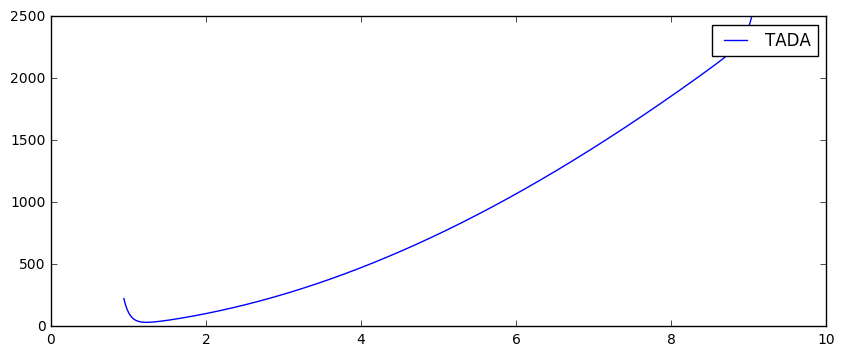

In [73]:
%time
distance_mix, pot_mix = particle_config_COU(charges=charges, sigma=sigmas,epsilon=epsilons)

plt.figure(figsize=(10,4))
plt.plot(distance_mix,pot_mix, label='TADA')
plt.legend()
